# Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the Dataset using pandas

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print(df.Survived)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Using Heatmap to see the Missing Data

* Heatmap is a graphical representation of 2D (two dimensional) data. Each data value represents in a matrix and it has a special color.
* The color of the matrix is dependent on value. Normally, low-value show in low-intensity color and high-value show in hight-intensity color format.

<Axes: >

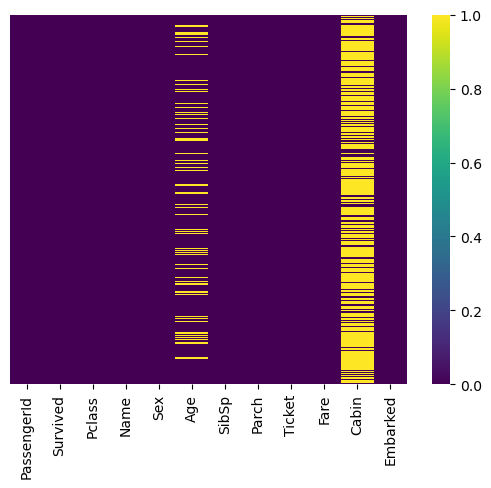

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

Here we can see roughly 20% of missing data in age column. The proportion of age missing is small engough for reasonable replacement with some form of imputation.whereas in the cabin column most of data are missing so we can drop this column.

<Axes: xlabel='Survived', ylabel='count'>

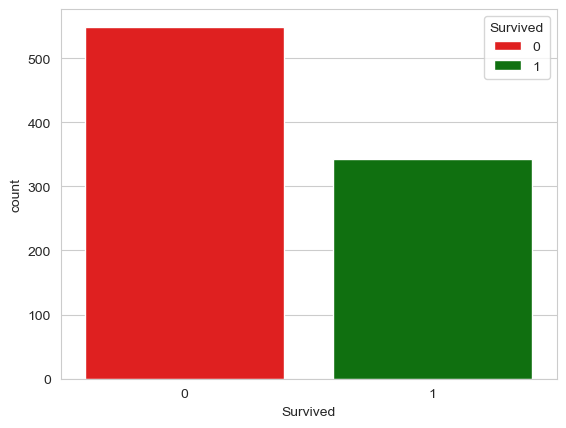

In [6]:
custom_palette={0:'red',1:'green'}
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Survived',data=df,palette=custom_palette)


<Axes: xlabel='Survived', ylabel='count'>

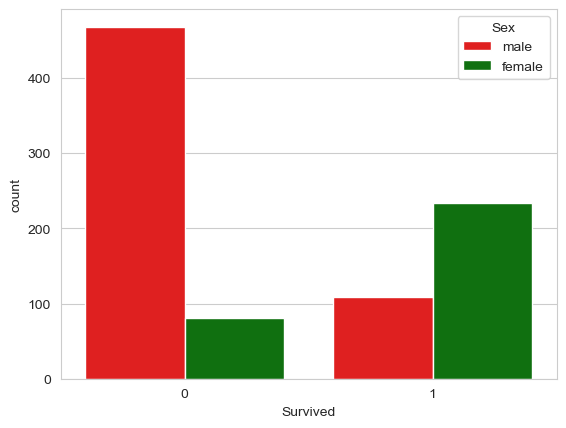

In [7]:
#sex column
c_p={'male':'red','female':'green'}
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette=c_p)

<Axes: xlabel='Survived', ylabel='count'>

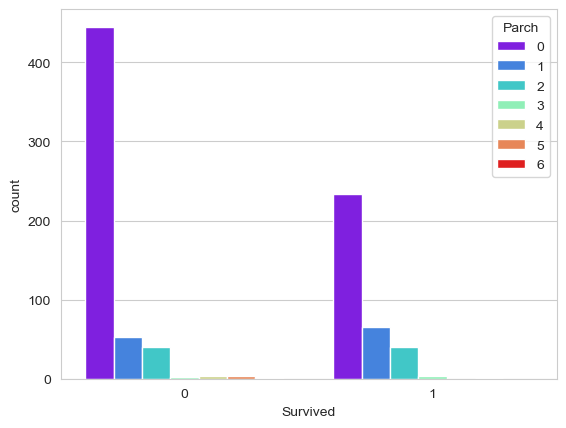

In [8]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=df,palette='rainbow')

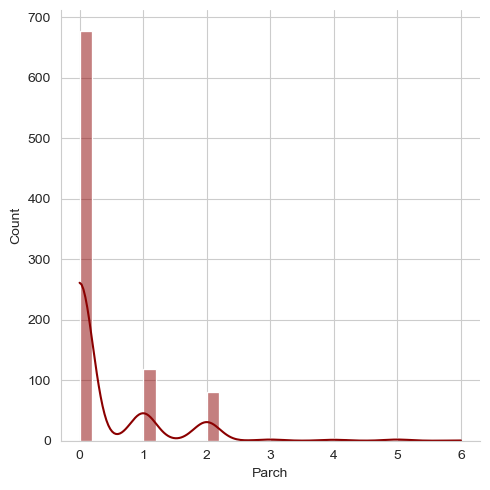

In [9]:
sns.displot(df['Parch'],kde=True,color='darkred',bins=30)

<Axes: xlabel='Survived', ylabel='count'>

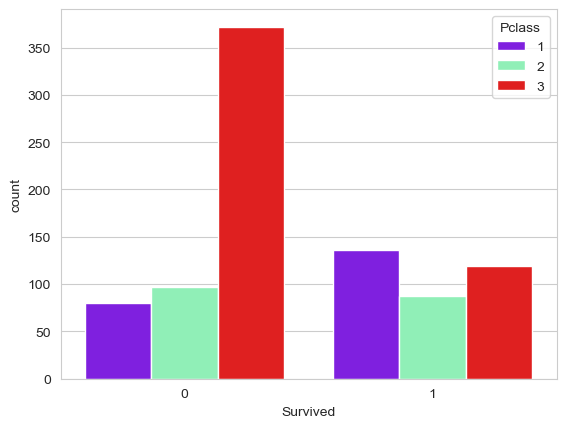

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Pclass', ylabel='Count'>

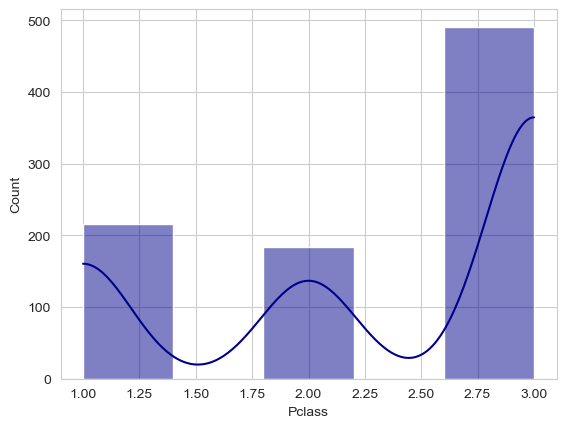

In [11]:
sns.histplot(df['Pclass'],kde=True,color='darkblue',bins=5)

<Axes: >

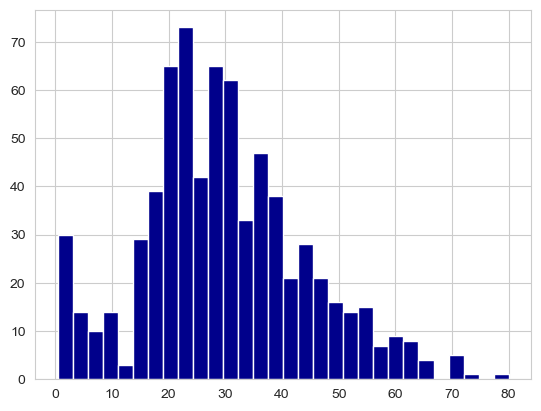

In [12]:
df['Age'].dropna().hist(bins=30,color='darkblue',alpha=1)

<Axes: xlabel='Survived', ylabel='count'>

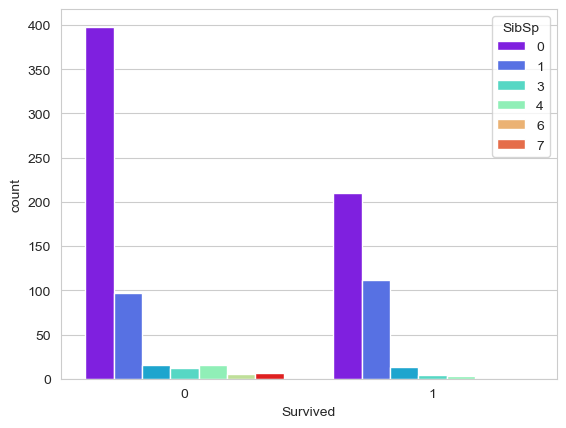

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=df,palette='rainbow')

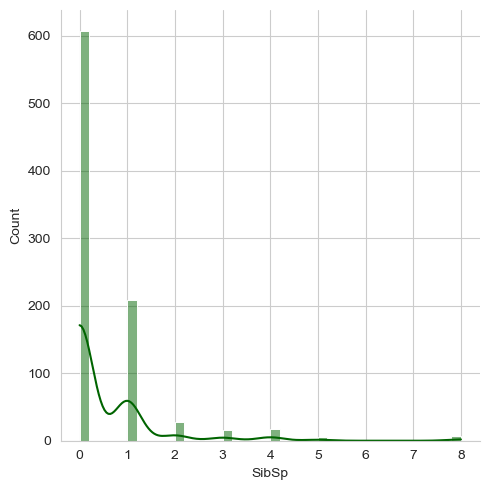

In [14]:
sns.displot(df['SibSp'],kde=True,color='darkgreen',bins=40)

<Axes: >

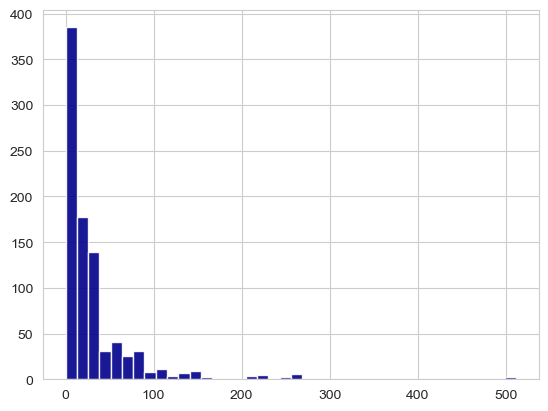

In [15]:
df['Fare'].hist(bins=40,color='darkblue',alpha=0.9)

# Data Cleaning

Instead of just dropping the missing values for age column we will fill the missing rows with mean value of that column.This is called Imputation.We can check the average age by the passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

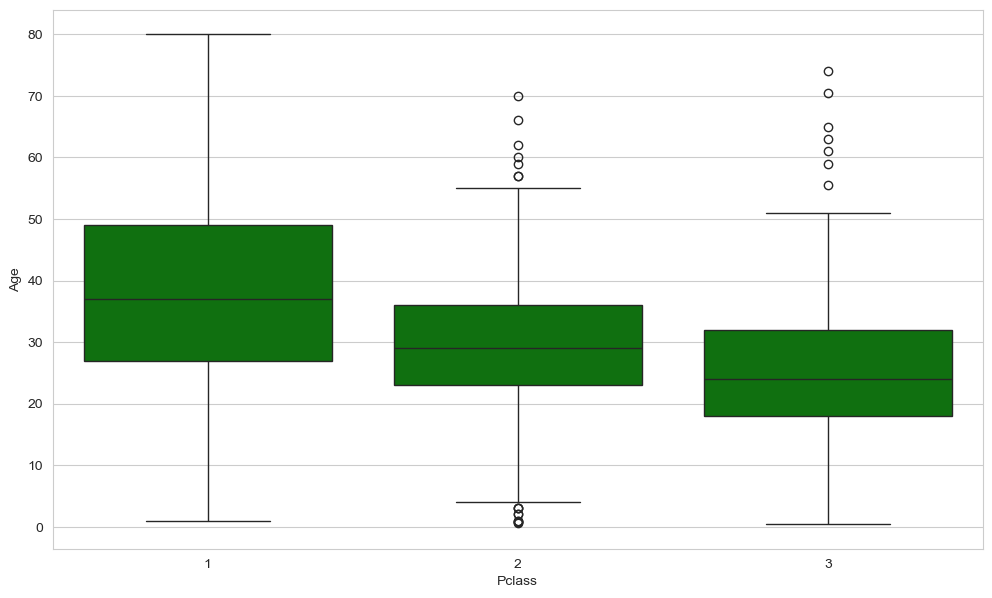

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=df,color='green')

In [17]:
def calculate_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        elif Pclass==3:
            return 24
        
    else:
        return Age

In [18]:
import warnings 
warnings.filterwarnings('ignore')
df['Age']=df[['Age','Pclass']].apply(calculate_age,axis=1)

<Axes: >

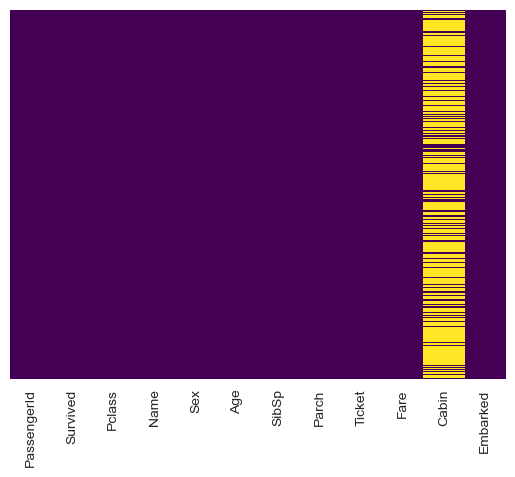

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

In [20]:
#column 'Sex' and column 'Embark'
sex=pd.get_dummies(df['Sex'],drop_first=True).astype(int)
embarked=pd.get_dummies(df['Embarked'],drop_first=True).astype(int)

In [21]:
df.drop(columns=['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],inplace=True)

In [22]:
df=pd.concat([df,sex,embarked],axis=1)

In [23]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Data is Ready for the Model!!!